In [31]:
import pandas as pd

import re

from numpy import array
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [19]:
df = pd.read_csv('data.csv')

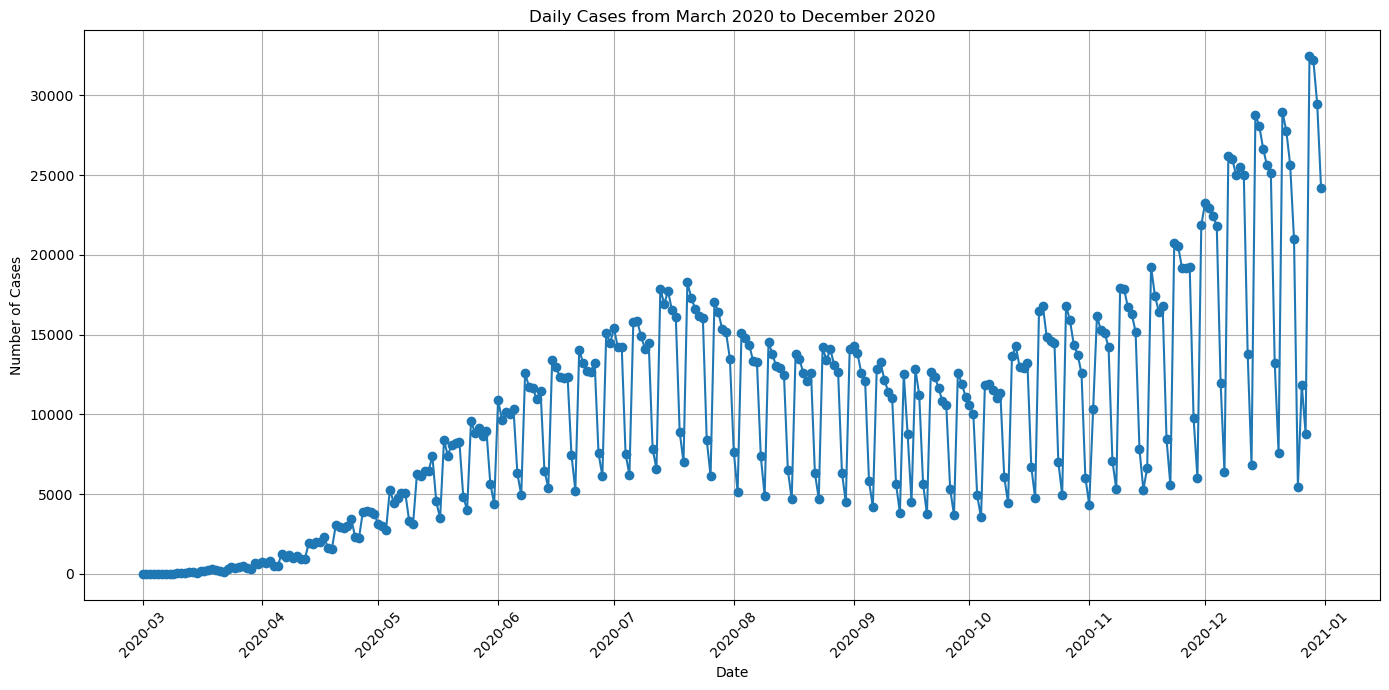

In [20]:
df_transposed = df.set_index(['cve_ent', 'poblacion', 'nombre']).T

df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'date'}, inplace=True)
df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

mask = (df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')
df_filtered = df_transposed.loc[mask]

df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
df_daily = df_filtered_numeric.sum(axis=1)

plt.figure(figsize=(14, 7))
plt.plot(df_filtered['date'], df_daily, marker='o', linestyle='-')
plt.title('Daily Cases from March 2020 to December 2020')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [21]:
estados_a_filtrar = ["Nacional", "DISTRITO FEDERAL", "GUANAJUATO", "JALISCO", "MORELOS", "PUEBLA", "QUERETARO"]
df_filtrado = df[df['nombre'].isin(estados_a_filtrar)]
df_filtrado.fillna(method='ffill', inplace=True)

C:\Users\eubgo\AppData\Local\Temp\ipykernel_3352\340870129.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtrado.fillna(method='ffill', inplace=True)
C:\Users\eubgo\AppData\Local\Temp\ipykernel_3352\340870129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.fillna(method='ffill', inplace=True)


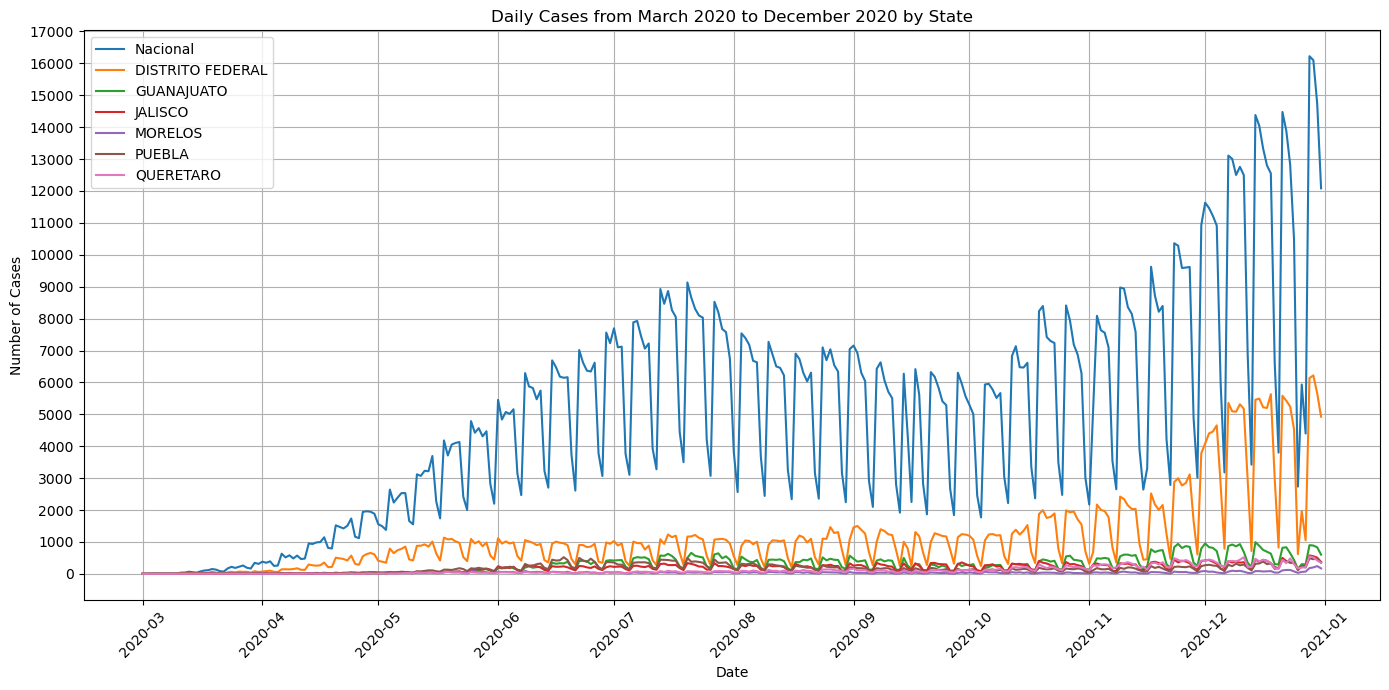

In [22]:
plt.figure(figsize=(14, 7))

max_cases = 0

for estado in estados_a_filtrar:
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    if df_daily.max() > max_cases:
        max_cases = df_daily.max()

    plt.plot(df_filtered['date'], df_daily, linestyle='-', label=estado)

plt.yticks(range(0, int(max_cases) + 1000, 1000))

plt.title('Daily Cases from March 2020 to December 2020 by State')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

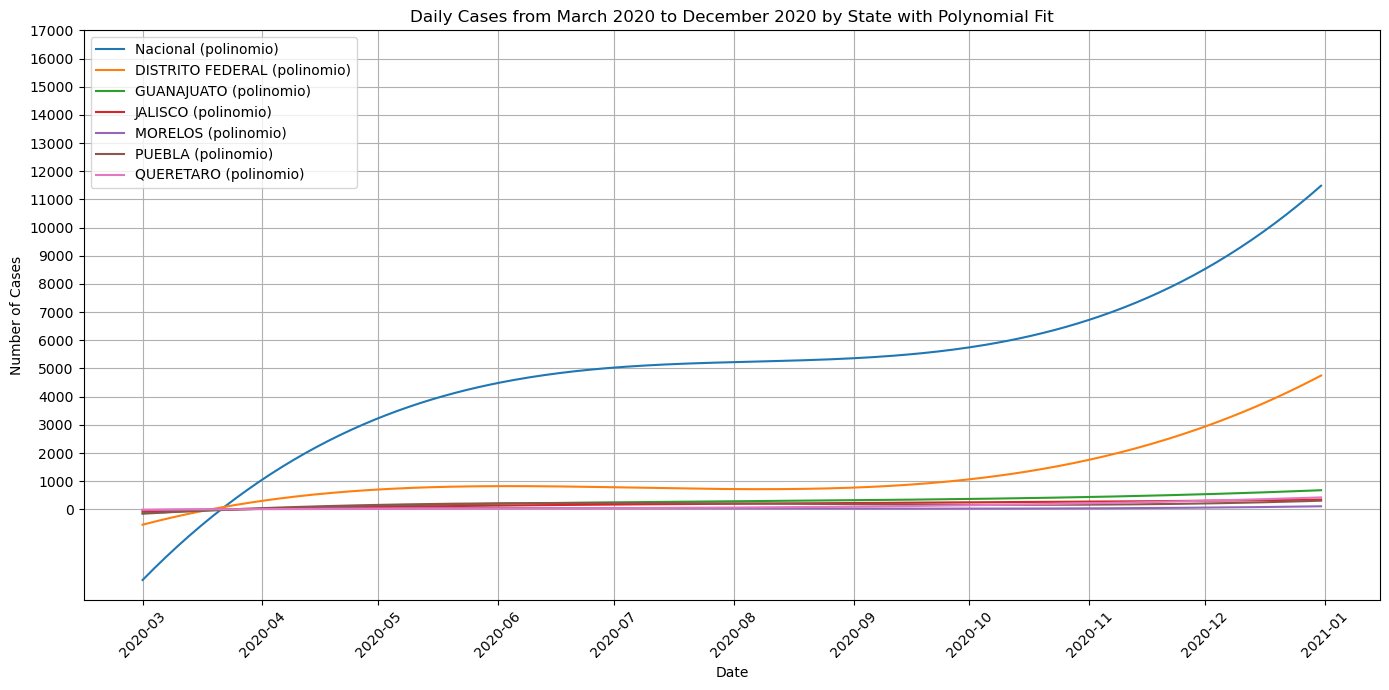

In [23]:
plt.figure(figsize=(14, 7))

max_cases = 0

for estado in estados_a_filtrar:
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    if df_daily.max() > max_cases:
        max_cases = df_daily.max()

    x = np.arange(len(df_daily))
    y = df_daily.values
    p = np.polyfit(x, y, 3)
    poly = np.poly1d(p)

    plt.plot(df_filtered['date'], poly(x), linestyle='-', label=f'{estado} (polinomio)')

plt.yticks(range(0, int(max_cases) + 1000, 1000))

plt.title('Daily Cases from March 2020 to December 2020 by State with Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

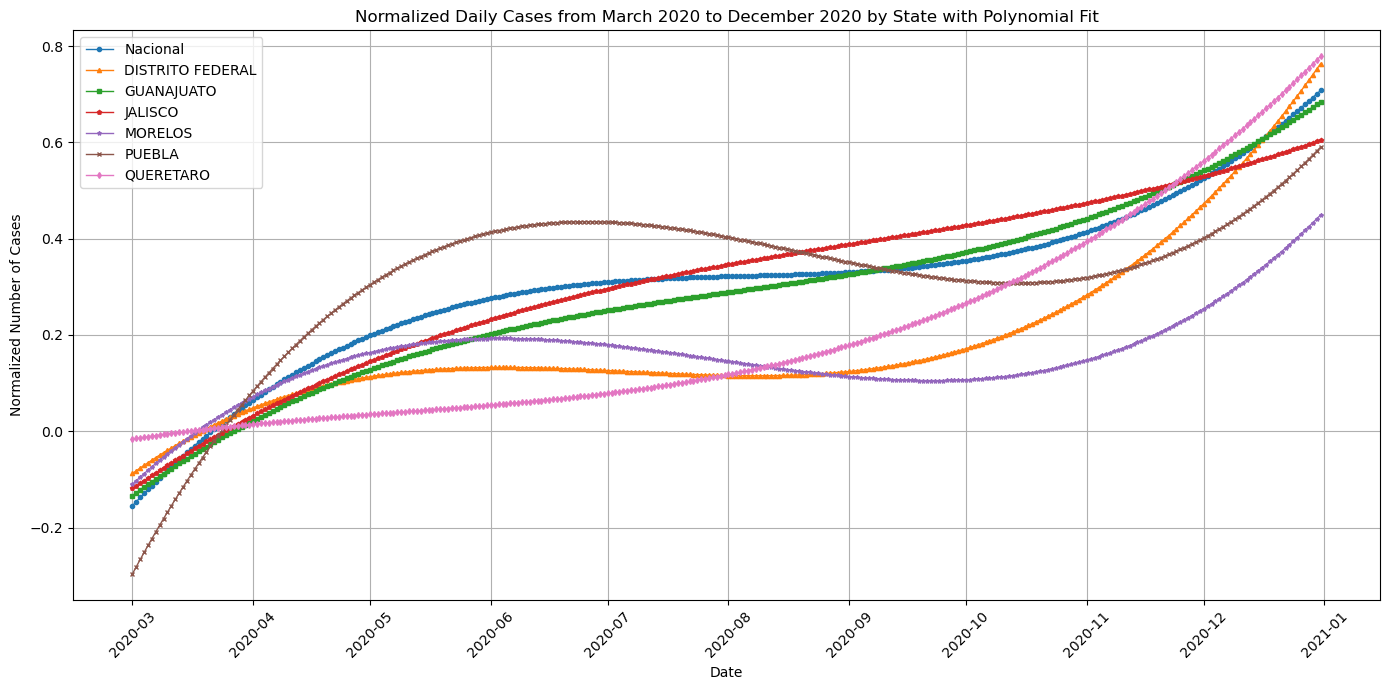

In [24]:
plt.figure(figsize=(14, 7))

markers = ['o', '^', 's', 'p', '*', 'x', 'd']

for estado, marker in zip(estados_a_filtrar, markers):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    scaler = MinMaxScaler()
    df_daily_normalized = scaler.fit_transform(df_daily.values.reshape(-1, 1)).flatten()

    x = np.arange(len(df_daily_normalized))
    p = np.polyfit(x, df_daily_normalized, 3)
    poly = np.poly1d(p)

    plt.plot(df_filtered['date'], poly(x), linestyle='-', marker=marker, markersize=3, linewidth=1, label=f'{estado}')

plt.title('Normalized Daily Cases from March 2020 to December 2020 by State with Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Normalized Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

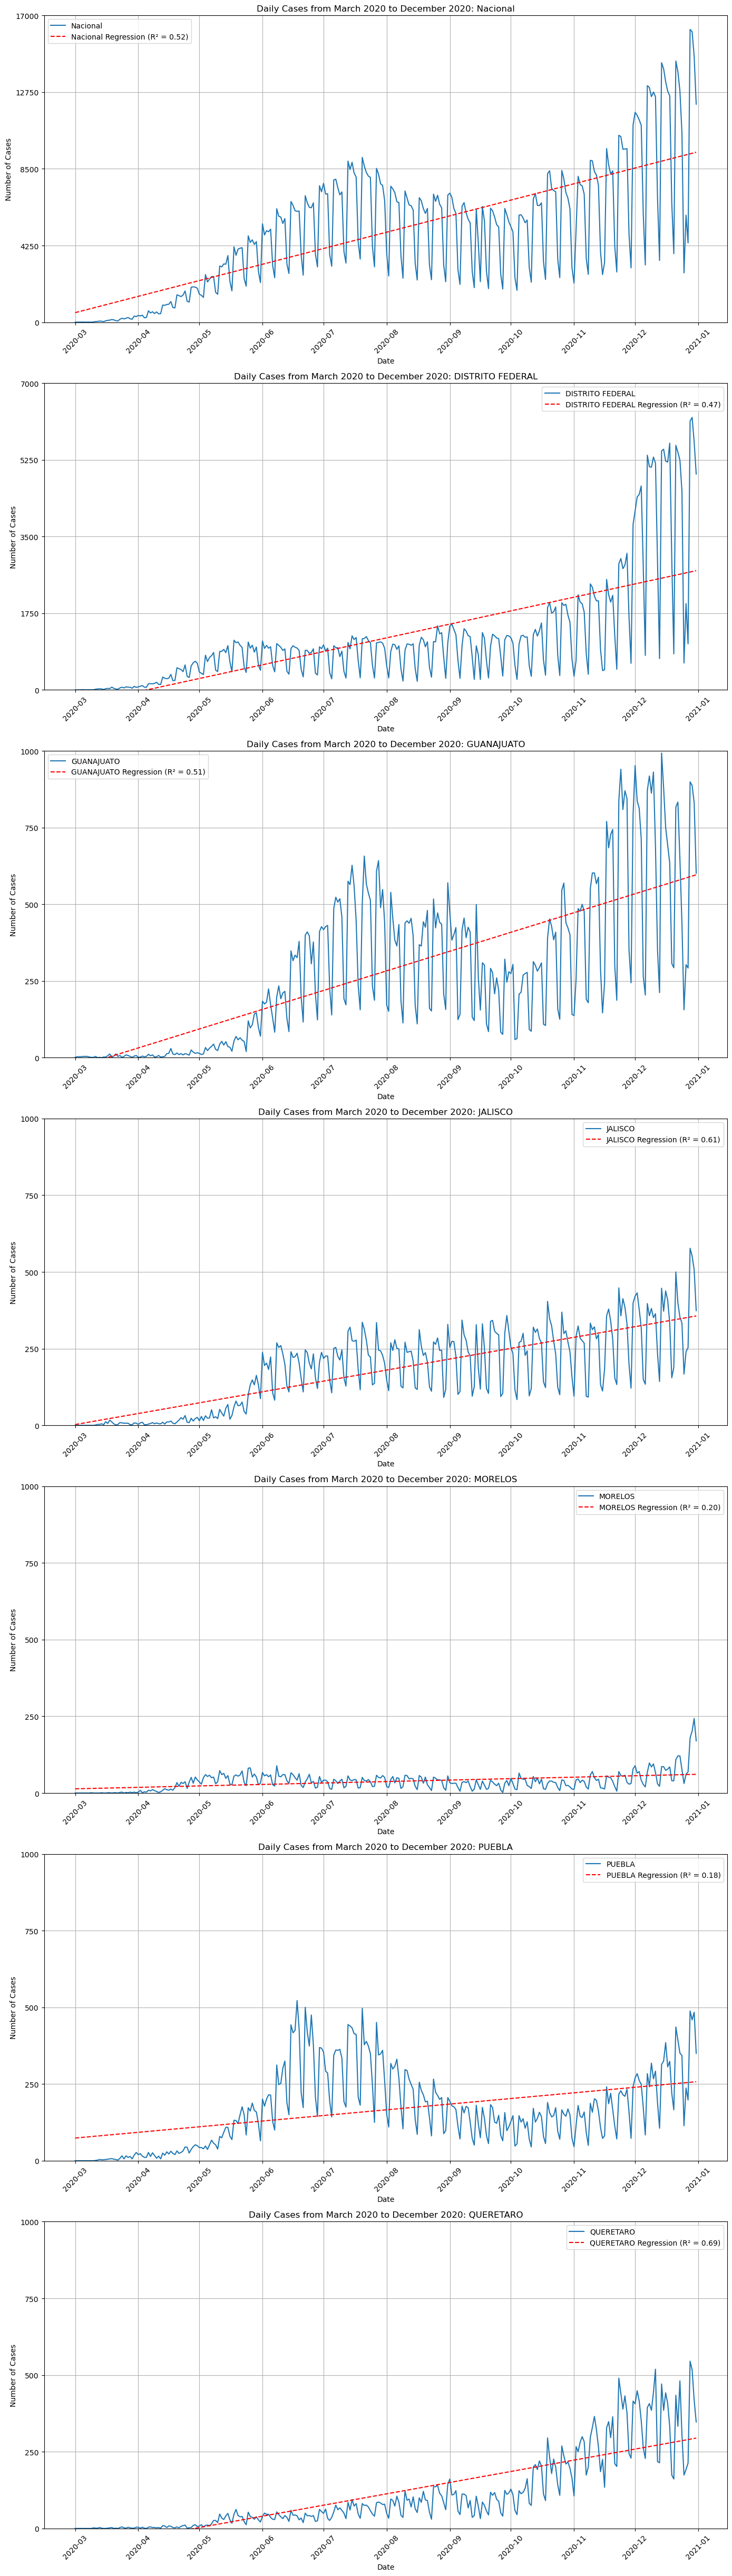

In [39]:
fig, axes = plt.subplots(len(estados_a_filtrar), 1, figsize=(14, 7 * len(estados_a_filtrar)))

if len(estados_a_filtrar) == 1:
    axes = [axes]
for ax, estado in zip(axes, estados_a_filtrar):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]
    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    x = np.array(range(len(df_daily))).reshape(-1, 1)
    y = df_daily.values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    r_squared = r2_score(y, y_pred)

    ax.plot(df_filtered['date'], df_daily, linestyle='-', label=f'{estado}')
    ax.plot(df_filtered['date'], y_pred, linestyle='--', color='red', label=f'{estado} Regression (R² = {r_squared:.2f})')
    ax.set_title(f'Daily Cases from March 2020 to December 2020: {estado}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Cases')
    ax.grid(True)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    max_daily_cases = df_daily.max()
    upper_limit = ((max_daily_cases // 1000) + 1) * 1000
    ax.set_ylim(0, upper_limit)
    ax.set_yticks(np.linspace(0, upper_limit, num=5))

plt.tight_layout()
plt.show()

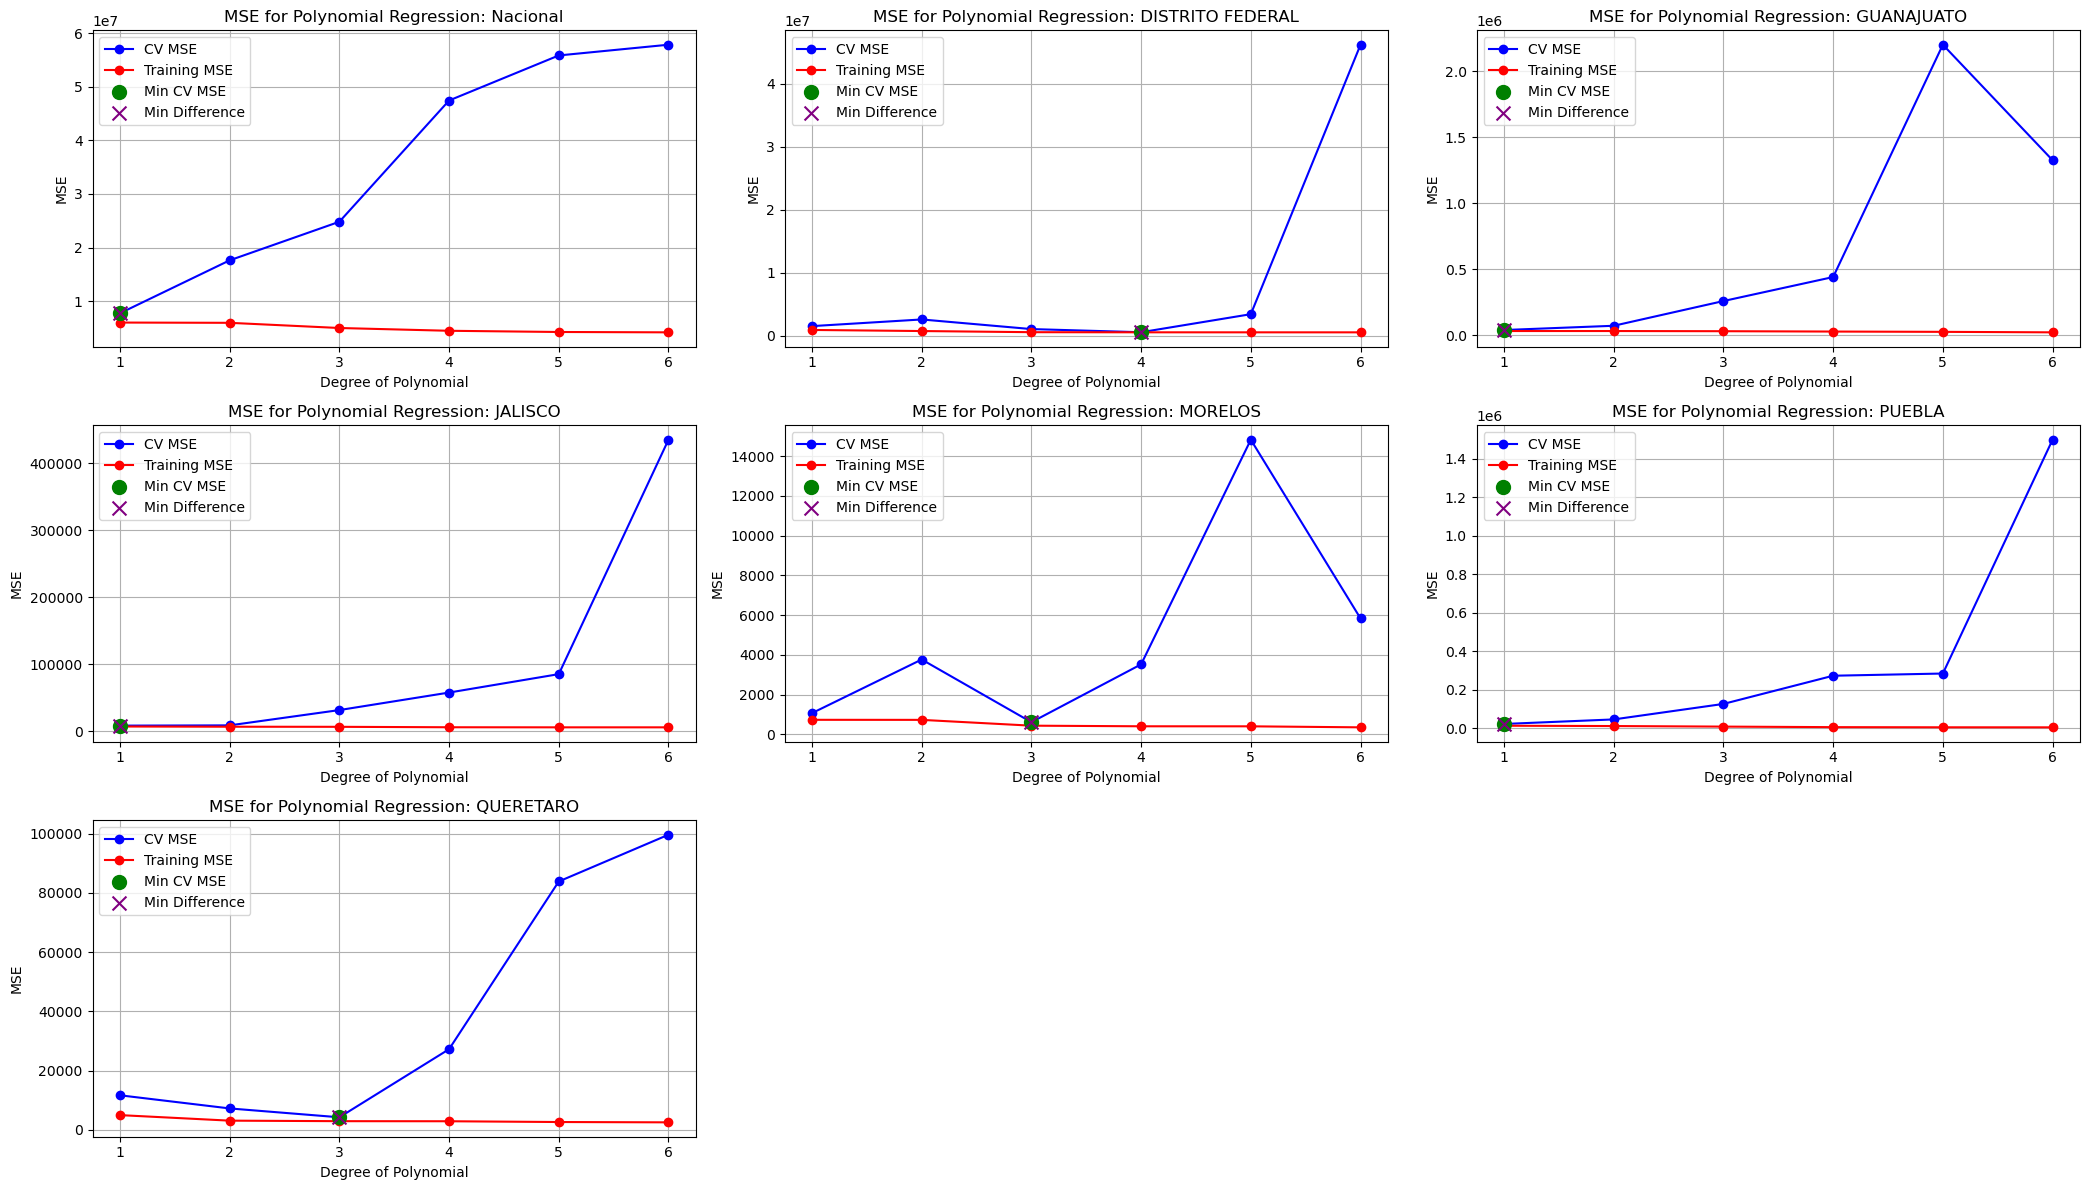

Nacional: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
DISTRITO FEDERAL: Optimal by difference = Degree 4, Optimal by CV MSE = Degree 4
GUANAJUATO: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
JALISCO: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
MORELOS: Optimal by difference = Degree 3, Optimal by CV MSE = Degree 3
PUEBLA: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
QUERETARO: Optimal by difference = Degree 3, Optimal by CV MSE = Degree 3
